<div style="text-align: right"> Brian Wiley <br/>
EN.705.601.3VL.SP20 Applied Machine Learning </div>

## Assignment 7
### Applied Machine Learning

__1. [20 pts] Keep the variables as one-hot encoded and develop a multiple linear regression
model. Use your model to predict the target variable for the people with age 20, male, and
generation X. What is the MAE error of this prediction? How many line coefficients are
there?__


In [1]:
## Import dataset and pre-process from assignment 3
import pandas as pd
import numpy as np
import seaborn as sns;
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/master.csv')

df = df.drop(np.setdiff1d(df.columns, ['sex', 'age', 'generation', 'suicides/100k pop']), axis=1)

In [2]:
df.head()

,sex,age,suicides/100k pop,generation
0,male,15-24 years,6.71,Generation X
1,male,35-54 years,5.19,Silent
2,female,15-24 years,4.83,Generation X
3,male,75+ years,4.59,G.I. Generation
4,male,25-34 years,3.28,Boomers


In [3]:
## the drop first goes by natural sort order, i.e. will drop female (f before m), 
## and Boomers since B is before rest
df2 = pd.get_dummies(df, columns=['age']) ## keep first for age
df2 = pd.get_dummies(df2, columns=['sex', 'generation'], drop_first=True)

In [4]:
df2.head()

,suicides/100k pop,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,sex_male,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,6.71,1,0,0,0,0,0,1,0,1,0,0,0
1,5.19,0,0,1,0,0,0,1,0,0,0,0,1
2,4.83,1,0,0,0,0,0,0,0,1,0,0,0
3,4.59,0,0,0,0,0,1,1,1,0,0,0,0
4,3.28,0,1,0,0,0,0,1,0,0,0,0,0


In [5]:
X = df2.loc[:, df2.columns != 'suicides/100k pop']
y = df2.loc[:, df2.columns == 'suicides/100k pop'].values.ravel()

Since when we OneHotEncoded and dropped first, which was the age group `15-24 years` we just need to add 1 for `male`, 0 for all the ages and 1 for GenX.

In [6]:
X.columns

Index(['age_15-24 years', 'age_25-34 years', 'age_35-54 years',
       'age_5-14 years', 'age_55-74 years', 'age_75+ years', 'sex_male',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')

In [7]:
## set index to keep for 
group_indices = df2.index[(df2['age_15-24 years'] == 1) &
                          (df2['sex_male'] == 1) &
                          (df2['generation_Generation X'] == 1)]

In [8]:
X_test = df2.loc[group_indices].loc[:, df2.columns != 'suicides/100k pop']
y_test = df2.loc[group_indices].loc[:, df2.columns == 'suicides/100k pop'].values.ravel()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = lin_reg.predict(X_test)
print(y_pred)

[17.08496094 17.08496094 17.08496094 ... 17.08496094 17.08496094
 17.08496094]


In [11]:
from sklearn.metrics import mean_absolute_error

print("MAE for Multiple Linear Regression with polynomial degree 1 is", mean_absolute_error(y_test, y_pred))

MAE for Multiple Linear Regression with polynomial degree 1 is 9.525742483148061


In [12]:
## get coefficients
coef = lin_reg.coef_

## there should be 12 since X has shape (N, 12)
print(coef)
len(coef) == X.shape[1]

[-8.78645245e+12 -8.78645245e+12 -8.78645245e+12 -8.78645245e+12
 -8.78645245e+12 -8.78645245e+12  1.48502356e+01  2.82395960e+00
 -8.13646627e-01 -1.58633000e+00 -1.82623678e+00 -6.04494376e-02]


True

In [13]:
def mae(_y, _y_pred):
    return (len(_y)**-1) * np.sum(np.abs(_y_pred-_y))

mae(y_test, y_pred) == mean_absolute_error(y_test, y_pred)

True

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred_poly = lin_reg_poly.predict(poly.fit_transform(X_test))
print(y_pred_poly)

[14.34375 14.34375 14.34375 ... 14.34375 14.34375 14.34375]


In [16]:
print(f"MAE for Multiple Linear Regression with polynomial degree {poly.get_params()['degree']} is", 
      mean_absolute_error(y_test, y_pred_poly))

MAE for Multiple Linear Regression with polynomial degree 5 is 8.704007805108798


#### This was better at 8.7 compared to 9.52 with polynomial degree 1, i.e linear regression. 



Just to visualize this group subset with plotting we can use PCA with n=2 for a 3D plot. We can do this with linear, which is just a plane at $z=y\_pred[0]$.  We will do this first with Linear Regression and then polynomial linear regression.

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=41)
#X_pca = np.around(pca.fit_transform(X), 7)
X_pca = pca.fit_transform(X)

lr_pca = LinearRegression()
lr_pca.fit(X_pca, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#X_test_pca_transformed = np.around(pca.transform(X_test), 7)
X_test_pca_transformed = pca.transform(X_test)
y_pca_predict = lr_pca.predict(X_test_pca_transformed)
print("MAE for Multiple Linear Regression with polynomial degree 1 and PCA=2 is", 
      mean_absolute_error(y_test, y_pca_predict))

MAE for Multiple Linear Regression with polynomial degree 1 and PCA=2 is 8.611900425154197


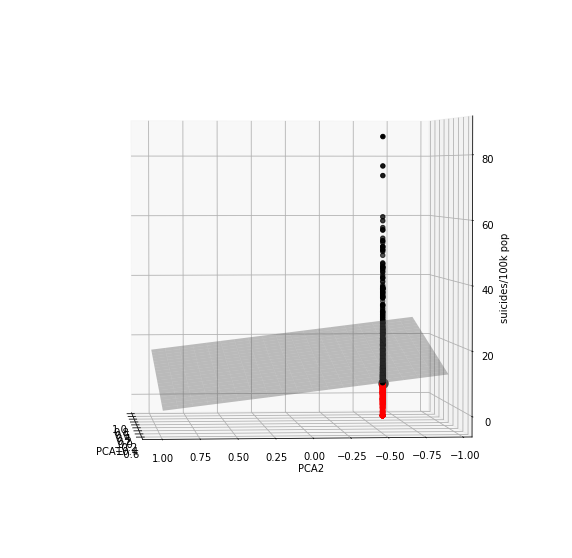

In [19]:
## plot it, it will just be a straight line up for actual data since x, y is from same group age 20, male, genX

## allow rotation
%matplotlib inline

## create meshgrid for independent and dependent variables
x1 = np.linspace(min(X_pca[:, 0]), max(X_pca[:, 0]), 20)
y1 = np.linspace(min(X_pca[:, 1]), max(X_pca[:, 1]), 20)
x_mesh1, y_mesh1 = np.meshgrid(x1, y1)
data_mesh1 = [np.array([x_mesh1[i], y_mesh1[i]]).T for i in range(len(x_mesh1))]
#z1 = np.full(shape=x_mesh1.shape, fill_value=y_pca_predict[0])  ## for the group age 20, male, genX
z_all = np.array([lr_pca.fit(X_pca, y).predict(data_mesh1[i]) for i in range(len(x_mesh1))]) # for all

## set for coloring of points above and below
points_above = y_test >= y_pca_predict
points_below = y_test < y_pca_predict

## get the x, y pca point for the groupage 20, male, genX
x_group, y_group = round(X_test_pca_transformed[0][0], 3), round(X_test_pca_transformed[0][1], 3)

fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')
ax.view_init(azim=175, elev=2)
#ax.plot_surface(x_mesh1, y_mesh1, z1, color='blue', alpha=0.4) ## this is if we want a plane for the group
ax.plot_surface(x_mesh1, y_mesh1, z_all, color='gray', alpha=0.4)
ax.scatter(X_pca[group_indices, 0][points_above], X_pca[group_indices, 1][points_above], y_test[points_above], color='k')
ax.scatter(X_pca[group_indices, 0][points_below], X_pca[group_indices, 1][points_below], y_test[points_below], color='r')
ax.scatter(x_group, y_group, y_pca_predict[0], linewidths=6, color='#514C4B')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('suicides/100k pop')

plt.show()

We can also plot for polynomial linear regression with PCA()

In [20]:
from sklearn.preprocessing import PolynomialFeatures

## Poly transform the previous PCA components
pca_poly = PolynomialFeatures(degree=5)
X_pca_poly = pca_poly.fit_transform(X_pca)

lr_pca_poly = LinearRegression()
lr_pca_poly.fit(X_pca_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pca_poly_predict = lr_pca_poly.predict(pca_poly.transform(X_test_pca_transformed))
print("MAE for Multiple Linear Regression with polynomial degree {} and PCA=2 is".format(pca_poly.get_params()['degree']), 
      mean_absolute_error(y_test, y_pca_poly_predict))

MAE for Multiple Linear Regression with polynomial degree 5 and PCA=2 is 8.56857852412488


#### MAE was 8.56 we are doing better.  Why was this better by doing a polynomial degree=5?  There is probably some spot in the data that is influencing this datapoint for this group of people.  It could be close or it could be far away and just really pulling this datapoint further from the point to minimize the MAE.  I also checked and the value wil depend on the `random_state` parameter passed to `PCA()`.  This is good to know for the future.

Now we are going to plot this the polynomial prediction surface with the linear surface to see why.  The prediction value is still the same value (different from linear degree=1 however) for each instance.

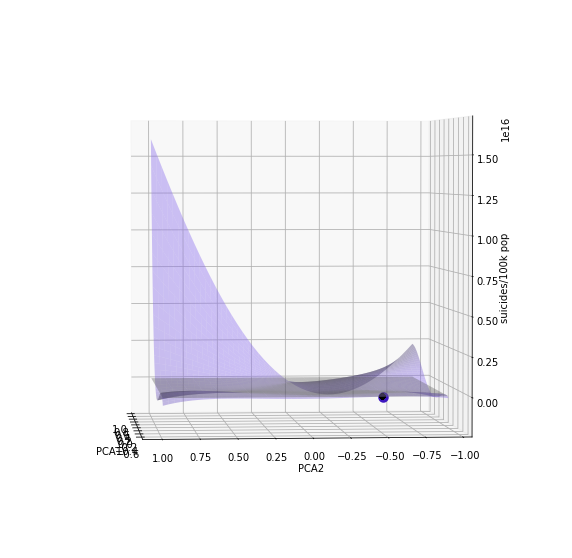

In [22]:
%matplotlib qt

x2 = np.linspace(min(X_pca[:, 0]), max(X_pca[:, 0]), 50)
y2 = np.linspace(min(X_pca[:, 1]), max(X_pca[:, 1]), 50)
x_mesh2, y_mesh2 = np.meshgrid(x2, y2)
data_mesh2 = [np.array([x_mesh2[i], y_mesh2[i]]).T for i in range(len(x_mesh2))]
z_pca_poly = np.array([lr_pca_poly.fit(X_pca_poly, y).predict(pca_poly.transform(data_mesh2[i])) for i in range(len(x_mesh2))]) 

## set for coloring of points above and below with PCA and Polynomial
points_above_poly = y_test >= y_pca_poly_predict
points_below_poly = y_test < y_pca_poly_predict

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.view_init(azim=175, elev=2)
ax.plot_surface(x_mesh1, y_mesh1, z_all, color='gray', alpha=0.4)
ax.plot_surface(x_mesh2, y_mesh2, z_pca_poly, color='#8B6CF5', alpha=0.4)
ax.scatter(X_pca[group_indices, 0][points_above_poly], 
           X_pca[group_indices, 1][points_above_poly], 
           y_test[points_above_poly], color='k')
ax.scatter(X_pca[group_indices, 0][points_below_poly], 
           X_pca[group_indices, 1][points_below_poly], 
           y_test[points_below_poly], color='r')
ax.scatter(x_group, y_group, y_pca_poly_predict[0], linewidths=6, color='#3E18BF')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('suicides/100k pop')

plt.show()

As you can see the linear surface in gray has a greater bias and less variance.  With a polynomial degree of 5 it goes up very high.  It is easier to see with `%matplotlib qt` outside of jupyter.

In [23]:
## plot function for different polynomials
def plot_poly_poc(degree=2, ax=None, first=False, **kwargs):
    pca_poly = PolynomialFeatures(degree=degree)
    X_pca_poly = pca_poly.fit_transform(X_pca)

    lr_pca_poly = LinearRegression()
    lr_pca_poly.fit(X_pca_poly, y)
    
    y_pca_poly_predict = lr_pca_poly.predict(pca_poly.transform(X_test_pca_transformed))
    print("MAE for Multiple Linear Regression with polynomial degree {} and PCA=2 is".format(pca_poly.get_params()['degree']), 
          mean_absolute_error(y_test, y_pca_poly_predict))
    
    x2 = np.linspace(min(X_pca[:, 0]), max(X_pca[:, 0]), 50)
    y2 = np.linspace(min(X_pca[:, 1]), max(X_pca[:, 1]), 50)
    x_mesh2, y_mesh2 = np.meshgrid(x2, y2)
    data_mesh2 = [np.array([x_mesh2[i], y_mesh2[i]]).T for i in range(len(x_mesh2))]
    z_pca_poly = np.array([lr_pca_poly.fit(X_pca_poly, y).predict(pca_poly.transform(data_mesh2[i])) for i in range(len(x_mesh2))]) 

    ## set for coloring of points above and below with PCA and Polynomial
    points_above_poly = y_test >= y_pca_poly_predict
    points_below_poly = y_test < y_pca_poly_predict

    ax.view_init(azim=175, elev=2)
    ax.plot_surface(x_mesh1, y_mesh1, z_all, color='gray', alpha=0.4)
    ax.plot_surface(x_mesh2, y_mesh2, z_pca_poly, color='#8B6CF5', alpha=0.4)
    ax.scatter(X_pca[group_indices, 0][points_above_poly], 
               X_pca[group_indices, 1][points_above_poly], 
               y_test[points_above_poly], color='k')
    ax.scatter(X_pca[group_indices, 0][points_below_poly], 
               X_pca[group_indices, 1][points_below_poly], 
               y_test[points_below_poly], color='r')
    ax.scatter(x_group, y_group, y_pca_poly_predict[0], linewidths=6, color='#3E18BF')
    
    return ax

In [24]:
## plot different polynomials with Gridspec with PCA=2
import matplotlib.gridspec as gridspec
%matplotlib qt

fig = plt.figure(figsize = (10,15), constrained_layout=True)
gs1 = gridspec.GridSpec(3, 2, figure = fig)
gs1.update(wspace=0.00, hspace=0.05) # set the spacing between axes.

ax1 = plt.subplot(gs1[0], projection='3d')
plot_poly_poc(degree=2, ax=ax1)
ax1.set_xlabel('PCA1')
ax1.set_title("Degree=2")

ax2 = plt.subplot(gs1[1], projection='3d')
plot_poly_poc(degree=3, ax=ax2)
ax2.set_title("Degree=3")

ax3 = plt.subplot(gs1[2], projection='3d')
plot_poly_poc(degree=4, ax=ax3)
ax3.set_xlabel('PCA1')
ax3.set_zlabel('suicides/100k pop')
ax3.set_title("Degree=4")

ax4 = plt.subplot(gs1[3], projection='3d')
plot_poly_poc(degree=5, ax=ax4)
ax4.set_zlabel('suicides/100k pop')
ax4.set_title("Degree=5")

ax5 = plt.subplot(gs1[4], projection='3d')
plot_poly_poc(degree=6, ax=ax5)
ax5.set_xlabel('PCA1')
ax5.set_ylabel('PCA2')
ax5.set_title("Degree=6")

ax6 = plt.subplot(gs1[5], projection='3d')
plot_poly_poc(degree=7, ax=ax6)
ax6.set_ylabel('PCA2')
ax6.set_zlabel('suicides/100k pop')
ax6.set_title("Degree=7")

MAE for Multiple Linear Regression with polynomial degree 2 and PCA=2 is 8.70831061252305
MAE for Multiple Linear Regression with polynomial degree 3 and PCA=2 is 8.997250564894916
MAE for Multiple Linear Regression with polynomial degree 4 and PCA=2 is 8.760987844692519
MAE for Multiple Linear Regression with polynomial degree 5 and PCA=2 is 8.56857852412488
MAE for Multiple Linear Regression with polynomial degree 6 and PCA=2 is 10.01998344370861
MAE for Multiple Linear Regression with polynomial degree 7 and PCA=2 is 9.151602172274124


Text(0.5, 0.92, 'Degree=7')

__2. [30 pts] Now use the original sex, age and generation variables in numerical form and
develop a new model. Use your model to predict the target variable for the people with age
20, male, and generation X. What is the MAE error of this prediction? How many line
coefficients are there? (Note that for this step you have to think of a way of encoding the
original nominal age feature and generation feature into numerical features.)__

In [25]:
df3 = df.copy(deep=True)

df3['sex'] = df3['sex'].map({'female': 0, 
                             'male': 1})

df3['age'] = df3['age'].map({'5-14 years': 0, 
                             '15-24 years': 1, 
                             '25-34 years': 2, 
                             '35-54 years': 3, 
                             '55-74 years': 4, 
                             '75+ years': 5})

df3['generation'] = df3['generation'].map({'Generation Z': 0, 
                                           'Millenials': 1, 
                                           'Generation X': 2, 
                                           'Boomers': 3, 
                                           'Silent': 4, 
                                           'G.I. Generation': 5})

In [26]:
df3.head()

,sex,age,suicides/100k pop,generation
0,1,1,6.71,2
1,1,3,5.19,4
2,0,1,4.83,2
3,1,5,4.59,5
4,1,2,3.28,3


So the results we got above where as follows with OneHotEncoding:
* Standard Linear Regression All Components Degree=1 - 9.52 
* Standard Linear Regression All Components Degree=5 - 8.7
* Standard Linear Regression 2 Primary Components Degree=1 - 8.61 
* Standard Linear Regression 2 Primary Components Degree=5 - 8.56

In [27]:
## set index to keep 
group_indices = df3.index[(df3['age'] == 1) &
                          (df3['sex'] == 1) &
                          (df3['generation'] == 2)]

In [28]:
_X = df3.loc[:, df3.columns != 'suicides/100k pop']
_y = df3.loc[:, df3.columns == 'suicides/100k pop'].values.ravel()

_X_test = df3.loc[group_indices].loc[:, df3.columns != 'suicides/100k pop']
_y_test = df3.loc[group_indices].loc[:, df3.columns == 'suicides/100k pop'].values.ravel()

In [29]:
## Standard Linear Regression All Components Degree=1
lin_reg2 = LinearRegression()
lin_reg2.fit(_X, _y)

_y_pred = lin_reg2.predict(_X_test)
print("New MAE for Multiple Linear Regression with polynomial degree 1 is", mean_absolute_error(_y_test, _y_pred))

New MAE for Multiple Linear Regression with polynomial degree 1 is 8.717371097655723


In [30]:
#Standard Linear Regression All Components Degree=5
_poly = PolynomialFeatures(degree=5)
_X_poly = _poly.fit_transform(_X)

_lin_reg_poly = LinearRegression()
_lin_reg_poly.fit(_X_poly, _y)

_y_pred_poly = _lin_reg_poly.predict(_poly.fit_transform(_X_test))

print(f"New MAE for Multiple Linear Regression with polynomial degree {_poly.get_params()['degree']} is", 
      mean_absolute_error(_y_test, _y_pred_poly))

New MAE for Multiple Linear Regression with polynomial degree 5 is 8.714476745408648


In [31]:
#Standard Linear Regression 2 Primary Components Degree=1
_pca = PCA(n_components=2, random_state=41)
_X_pca = _pca.fit_transform(_X)

_lr_pca = LinearRegression()
_lr_pca.fit(_X_pca, _y)

_X_test_pca_transformed = _pca.transform(_X_test)
_y_pca_predict = lr_pca.predict(_X_test_pca_transformed)
print("New MAE for Multiple Linear Regression with polynomial degree 1 and PCA=2 is", 
      mean_absolute_error(_y_test, _y_pca_predict))

New MAE for Multiple Linear Regression with polynomial degree 1 and PCA=2 is 12.600128656380033


In [32]:
#Standard Linear Regression 2 Primary Components Degree=5
_pca_poly = PolynomialFeatures(degree=5)
_X_pca_poly = _pca_poly.fit_transform(_X_pca)

_lr_pca_poly = LinearRegression()
_lr_pca_poly.fit(_X_pca_poly, _y)

_y_pca_poly_predict = _lr_pca_poly.predict(_pca_poly.transform(_X_test_pca_transformed))
print("MAE for Multiple Linear Regression with polynomial degree {} and PCA=2 is".format(_pca_poly.get_params()['degree']), 
      mean_absolute_error(_y_test, _y_pca_poly_predict))

MAE for Multiple Linear Regression with polynomial degree 5 and PCA=2 is 8.924302537437944


Here are the new results not using OneHotEncoding:
* Standard Linear Regression All Components Degree=1 - <span style="color:red">~~9.52~~</span> 8.71
* Standard Linear Regression All Components Degree=5 - <span style="color:red">~~8.7~~</span> 8.71
* Standard Linear Regression 2 Primary Components Degree=1 - <span style="color:red">~~8.61~~</span> 12.6
* Standard Linear Regression 2 Primary Components Degree=5 - <span style="color:red">~~8.56~~</span> 8.92

__3. [10 pts] Did you note any change in these two model performances?__
<p>Looks like the MAE did better without OneHotEncoding encoding compared to a strictly linear version using OneHotEncoding.  However when we do PCA() on the OneHotEncoded data with a polynomial of degree 5 or 6 it is better. Since we only have 3 variables when we map the data to a value.

In [33]:
_coef = lin_reg2.coef_

## there should be 12 since X has shape (N, 12)
print(_coef)
len(_coef)

[14.84646226  3.70818792  0.42179613]


3

__4. [10 pts] What is the prediction for age 33, male and generation Alpha (i.e. the generation
after generation Z)?__

We can do this with the OneHotEncoded Data but we have to remove the `drop_first=True` parameter for that column specifically and add all zeros.

In [34]:
df4 = pd.get_dummies(df, columns=['age', 'sex'], drop_first=True) 
df4 = pd.get_dummies(df4, columns=['generation']) ## keep first for generation
df4.head()

,suicides/100k pop,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,sex_male,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,6.71,0,0,0,0,0,1,0,0,1,0,0,0
1,5.19,0,1,0,0,0,1,0,0,0,0,0,1
2,4.83,0,0,0,0,0,0,0,0,1,0,0,0
3,4.59,0,0,0,0,1,1,0,1,0,0,0,0
4,3.28,1,0,0,0,0,1,1,0,0,0,0,0


In [35]:
X_4 = df4.loc[:, df4.columns != 'suicides/100k pop']
X_4.head()

,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,sex_male,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,1,0,1,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,0,0


In [36]:
X_4_test = np.array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]).reshape(1, -1)

lr_4 = LinearRegression()
predict = lr_4.fit(X_4, y).predict(X_4_test)
print("Prediction for age 33, male, in genA", predict[0])

Prediction for age 33, male, in genA -4739326300492.712


The reason the value is negative is that there is no data for that particular example.  Let try adding a value and moving the generations down 1 for the numerical data.

In [37]:
from collections import OrderedDict 

df4a = df.copy(deep=True)

df4a['sex'] = df4a['sex'].map({'female': 0, 
                             'male': 1})

df4a['age'] = df4a['age'].map({'5-14 years': 0, 
                             '15-24 years': 1, 
                             '25-34 years': 2, 
                             '35-54 years': 3, 
                             '55-74 years': 4, 
                             '75+ years': 5})

gen_map = OrderedDict({'Generation Alpha': 0,
                       'Generation Z': 1, 
                       'Millenials': 2, 
                       'Generation X': 3, 
                       'Boomers': 4, 
                       'Silent': 5, 
                       'G.I. Generation': 6})

df4a['generation'] = df4a['generation'].map(gen_map)

In [38]:
X_4a = df4a.loc[:, df4a.columns != 'suicides/100k pop']
sum(X_4a.generation == 0)

0

In [39]:
X_4a.head()

,sex,age,generation
0,1,1,3
1,1,3,5
2,0,1,3
3,1,5,6
4,1,2,4


In [40]:
X_4a_test = np.array([1, 2, 0]).reshape(1, -1)

lr_4a = LinearRegression()
predict_4a = lr_4.fit(X_4a, y).predict(X_4a_test)
print("Prediction for age 33, male, in genA", predict_4a[0])

Prediction for age 33, male, in genA 16.84891852065249


So this one make sense because if we test with each other generation we see if going down and this number is near the generation before it.

In [41]:
for k, v in OrderedDict(reversed(list(gen_map.items()))).items():
    X_4b_test = np.array([1, 2, v]).reshape(1, -1)
    predict_4b = lr_4a.fit(X_4a, y).predict(X_4b_test)
    print(f'Prediction for age 33, male, in {k:<18} {round(predict_4b[0], 4):<20}')

Prediction for age 33, male, in G.I. Generation    19.3797             
Prediction for age 33, male, in Silent             18.9579             
Prediction for age 33, male, in Boomers            18.5361             
Prediction for age 33, male, in Generation X       18.1143             
Prediction for age 33, male, in Millenials         17.6925             
Prediction for age 33, male, in Generation Z       17.2707             
Prediction for age 33, male, in Generation Alpha   16.8489             


__5. [10 pts] Give one advantage when using regression (as opposed to classification with
nominal features) in terms of input data features.__

The one feature is that you do not have to worry about the model making an interpretation, i.e. assuming and ordering, on the numerical data.  The value of the data will be incorporated into regression algorithm and may have affect the loss function less that in logistic regression or classification by bucketing the dependent variable.

__6. [10 pts bonus] Give one advantage when using regular numerical values rather than onehot encoding for regression.__

One advantage is upkeep with the model.  If you have you data in OneHotEncoded you will have to continue to have the new data OneHotEncoded.  The other advantage is basically what we saw with the above.  The linear regression formula gave a really low negative number, which is not invalid as we can have negative numbers with linear regression because we can cross the x-intercept with the fitted line, but that sparse matrix made it harder to come up a valid estimate.  Since sometime a nominal ordering is valid, as we saw in the data exploration step in Assignment 3 where there was correlation between generation and suicide rate, it can be beneficial to make predictions on data we have not seen before by giving a value to these examples (which is a priori bias) can help make a prediction that is more valid.  This is where we have the difference between frequentists vs. Bayesian statistics.